In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time as _time
from datetime import datetime, timedelta

In [4]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")
submit_sample = pd.read_csv("submit_sample.csv")

In [5]:
storms = pd.read_excel("StormEvents2015 - Copy.xlsx")
winds = pd.read_excel("2015_windV1.xlsx")

In [6]:
def scheduled_time_func(year, month, day, time):
    time = round(time)
    if day <= 9:
        day_string = '0'+ str(day)
    else:
        day_string = str(day)
    
    my_string = '0000'

    my_string = '0000' + str(time)

    length_string = len(str(time))

    time_string = my_string[length_string:]
    time_string = time_string[0:2]+':'+time_string[2:4]

    
    date_string =str(year)+ '-'+'0'+str(month)+'-'+day_string+ ' ' +time_string+ ':00' 
    
    datetime_object = datetime.fromisoformat(date_string)
    return datetime_object

In [7]:
def departure_time_func(year, month, day, time, scheduledDeparture, arrival_delay):
    time = round(time)
    if day <= 9:
        day_string = '0'+ str(day)
    else:
        day_string = str(day)
    
    my_string = '0000'

    my_string = '0000' + str(time)

    length_string = len(str(time))

    time_string = my_string[length_string:]
    time_string = time_string[0:2]+':'+time_string[2:4]

    
    date_string =str(year)+ '-'+'0'+str(month)+'-'+day_string+ ' ' +time_string+ ':00' 
    
    datetime_object = datetime.fromisoformat(date_string)
    
    #if(scheduledDeparture < datetime_object)and(arrival_delay<1440):
    #    datetime_object = datetime_object -timedelta(days=1)
    #elif arrival_delay>1440:
    #    datetime_object = datetime_object + timedelta(days=1)
    #else:
    #        datetime_object = datetime_object
    return datetime_object

In [8]:
train.loc[(train.DEPARTURE_TIME == 2400), 'DEPARTURE_TIME'] = 0


In [9]:
train.loc[(train['SCHEDULED_DEPARTURE'] == 2400)] 

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY


In [10]:
train.loc[(train['DEPARTURE_TIME'] == 2400)] 

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818553 entries, 0 to 2818552
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   int64  
 1   YEAR                 int64  
 2   MONTH                int64  
 3   DAY                  int64  
 4   DAY_OF_WEEK          int64  
 5   AIRLINE              object 
 6   FLIGHT_NUMBER        int64  
 7   TAIL_NUMBER          object 
 8   ORIGIN_AIRPORT       object 
 9   DESTINATION_AIRPORT  object 
 10  SCHEDULED_DEPARTURE  int64  
 11  DEPARTURE_TIME       float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  DISTANCE             int64  
 16  SCHEDULED_ARRIVAL    int64  
 17  ARRIVAL_DELAY        float64
dtypes: float64(5), int64(9), object(4)
memory usage: 387.1+ MB


In [12]:
storms['STATE'] = storms['STATE'].replace(['NEW HAMPSHIRE'],'NH')
storms['STATE'] = storms['STATE'].replace(['ARKANSAS'],'AR')
storms['STATE'] = storms['STATE'].replace(['OKLAHOMA'],'OK')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'TX')
storms['STATE'] = storms['STATE'].replace(['ALABAMA'],'AL')
storms['STATE'] = storms['STATE'].replace(['ALASKA'],'AK')
storms['STATE'] = storms['STATE'].replace(['ARIZONA'],'AZ')
storms['STATE'] = storms['STATE'].replace(['CALIFORNIA'],'CA')
storms['STATE'] = storms['STATE'].replace(['COLORADO'],'CO')
storms['STATE'] = storms['STATE'].replace(['CONNECTICUT'],'CT')
storms['STATE'] = storms['STATE'].replace(['DELAWARE'],'DE')
storms['STATE'] = storms['STATE'].replace(['FLORIDA'],'FL')
storms['STATE'] = storms['STATE'].replace(['GEORGIA'],'GA')
storms['STATE'] = storms['STATE'].replace(['HAWAII'],'HI')
storms['STATE'] = storms['STATE'].replace(['IDAHO'],'ID')
storms['STATE'] = storms['STATE'].replace(['ILLINOIS'],'IL')
storms['STATE'] = storms['STATE'].replace(['INDIANA'],'IN')
storms['STATE'] = storms['STATE'].replace(['IOWA'],'IA')
storms['STATE'] = storms['STATE'].replace(['KANSAS'],'KS')
storms['STATE'] = storms['STATE'].replace(['KENTUCKY'],'KY')
storms['STATE'] = storms['STATE'].replace(['LOUISIANA'],'LA')
storms['STATE'] = storms['STATE'].replace(['MAINE'],'ME')
storms['STATE'] = storms['STATE'].replace(['MARYLAND'],'MD')
storms['STATE'] = storms['STATE'].replace(['MASSACHUSETTS'],'MA')
storms['STATE'] = storms['STATE'].replace(['MICHIGAN'],'MI')
storms['STATE'] = storms['STATE'].replace(['MINNESOTA'],'MN')
storms['STATE'] = storms['STATE'].replace(['MISSISSIPPI'],'MS')
storms['STATE'] = storms['STATE'].replace(['MISSOURI'],'MO')
storms['STATE'] = storms['STATE'].replace(['MONTANA'],'MT')
storms['STATE'] = storms['STATE'].replace(['NEBRASKA'],'NE')
storms['STATE'] = storms['STATE'].replace(['NEVADA'],'NV')
storms['STATE'] = storms['STATE'].replace(['NEW JERSEY'],'NJ')
storms['STATE'] = storms['STATE'].replace(['NEW MEXICO'],'NM')
storms['STATE'] = storms['STATE'].replace(['NEW YORK'],'NY')

storms['STATE'] = storms['STATE'].replace(['NORTH CAROLINA'],'NC')
storms['STATE'] = storms['STATE'].replace(['NORTH DAKOTA'],'ND')
storms['STATE'] = storms['STATE'].replace(['OHIO'],'OH')
storms['STATE'] = storms['STATE'].replace(['OREGON'],'OR')
storms['STATE'] = storms['STATE'].replace(['PENNSYLVANIA'],'PA')
storms['STATE'] = storms['STATE'].replace(['RHODE ISLAND'],'RI')
storms['STATE'] = storms['STATE'].replace(['SOUTH CAROLINA'],'SC')
storms['STATE'] = storms['STATE'].replace(['SOUTH DAKOTA'],'SD')
storms['STATE'] = storms['STATE'].replace(['TENNESSEE'],'MO')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'MT')
storms['STATE'] = storms['STATE'].replace(['UTAH'],'UT')
storms['STATE'] = storms['STATE'].replace(['VERMONT'],'VT')
storms['STATE'] = storms['STATE'].replace(['VIRGINIA'],'VA')
storms['STATE'] = storms['STATE'].replace(['WASHINGTON'],'WA')
storms['STATE'] = storms['STATE'].replace(['WEST VIRGINIA'],'WV')
storms['STATE'] = storms['STATE'].replace(['WISCONSIN'],'WI')
storms['STATE'] = storms['STATE'].replace(['WYOMING'],'WY')

storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['January'], '1')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['February'], '2')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['March'], '3')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['April'], '4')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['May'], '5')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['June'], '6')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['July'], '7')

In [13]:
def airport_func (airport):
    if airport  == "AUS":
        state = "TX"
    elif airport == "ANC":
        state = "AK"
    elif airport == "SFO":
        state = "CA"
    elif airport == "LAX":
        state = "CA"
    elif airport == "SEA":
        state = "WA"
    elif airport == "LAS":
        state = "NV"
    elif airport == "DEN":
        state = "CO"
    elif airport == "SLC":
        state = "UT"
    elif airport == "PDX":
        state = "OR"
    elif airport == "FAI":
        state = "AK"
    elif airport == "MSP":
        state = "MN"
    elif airport == "PHX":
        state = "AZ"
    elif airport == "PBG":
        state = "NY"
    elif airport == "IAG":
        state = "NY"
    elif airport == "PSE":
        state = "CA"
    elif airport == "MKE":
        state = "WI"
    elif airport == "ORD":
        state = "IL"
    elif airport == "GEG":
        state = "WA"
    elif airport == "HNL":
        state = "HI"
    elif airport == "ONT":
        state = "CA"
    elif airport == "MCO":
        state = "FA"
    elif airport == "BOS":
        state = "MA"
    elif airport == "HIB":
        state = "MN"
    elif airport == "ABR":
        state = "SD"
    elif airport == "DFW":
        state = "TX"
        
    elif airport == "IAH":
        state = "TX"
    elif airport == "BNA":
        state = "MO"
    elif airport == "BRO":
        state = "TX"
    elif airport == "VPS":
        state = "FA"
    elif airport == "BOI":
        state = "ID"
    elif airport == "PHL":
        state = "PA"
    elif airport == "SBN":
        state = "IN"
    elif airport == "EUG":
        state = "OR"
    elif airport == "IAD":
        state = "VA"
    elif airport == "BUF":
        state = "NY"
    elif airport == "PMW":
        state = "ME"
    elif airport == "JFK":
        state = "NY"
    elif airport == "CRP":
        state = "TX"
    elif airport == "PIA":
        state = "IL"
    elif airport == "FAT":
        state = "CA"
    elif airport == "SMF":
        state = "CA"
    elif airport == "MCI":
        state = "MO"
    elif airport == "ATL":
        state = "GA"
        
    elif airport == "ATL":
        state = "GA"
    elif airport == "JAX":
        state = "FL"
    elif airport == "MFR":
        state = "OR"
    elif airport == "IDA":
        state = "ID"
    elif airport == "MSN":
        state = "WI"
    elif airport == "DCA":
        state = "VA"
    elif airport == "SAT":
        state = "TX"
    elif airport == "CHS":
        state = "SC"
    elif airport == "SBA":
        state = "CA"
    elif airport == "IND":
        state = "IN"
    elif airport == "DLE":
        state = "VA"
    elif airport == "GSP":
        state = "SC"
    elif airport == "BDL":
        state = "CT"
    elif airport == "RIC":
        state = "VA"
    elif airport == "BFL":
        state = "CA"
    elif airport == "OMA":
        state = "NE"
    elif airport == "RDM":
        state = "OR"
    elif airport == "FLL":
        state = "FL"
        
        
    elif airport == "CIP":
        state = "NV"
    elif airport == "TPA":
        state = "CA"
    elif airport == "SYR":
        state = "NY"
    elif airport == "ROC":
        state = "NY"
    elif airport == "TYR":
        state = "TX"
    elif airport == "LAN":
        state = "MI"
    elif airport == "GSO":
        state = "NC"
    elif airport == "EWR":
        state = "NJ"
    elif airport == "PBI":
        state = "CA"
    elif airport == "RSW":
        state = "CA"
    elif airport == "OAK":
        state = "CA"
    elif airport == "PVD":
        state = "RI"
    elif airport == "RNO":
        state = "NV"
    elif airport == "PIT":
        state = "PA"
    elif airport == "ABQ":
        state = "NM"
    elif airport == "MIA":
        state = "FL"
    elif airport == "BWI":
        state = "MD"
    elif airport == "TUL":
        state = "OK"
    elif airport == "LGA":
        state = "NY"
    elif airport == "LIT":
        state = "OR"
    elif airport == "MSY":
        state = "LA"
    
    elif airport == "OKC":
        state = "OK"
    elif airport == "ATW":
        state = "WI"
    elif airport == "PNS":
        state = "FL"
    elif airport == "MEM":
        state = "TN"
    elif airport == "TYS":
        state = "TN"
    elif airport == "MHT":
        state = "WA"
    elif airport == "SAV":
        state = "GA"
    elif airport == "CLT":
        state = "NC"
    elif airport == "GRB":
        state = "WI"
    elif airport == "ABE":
        state = "PA"
    elif airport == "JAN":
        state = "MS"
    elif airport == "OAJ":
        state = "NC"
    elif airport == "FAR":
        state = "ND"
    elif airport == "ERI":
        state = "PA"
    elif airport == "LEX":
        state = "KY"
    elif airport == "CWA":
        state = "WI"
    elif airport == "TIN":
        state = "AK"
    elif airport == "RDU":
        state = "NC"
    elif airport == "BHM":
        state = "AL"
    elif airport == "ACY":
        state = "NJ"
    elif airport == "DTW":
        state = "MI"
    elif airport == "RAP":
        state = "SD"
    elif airport == "TUS":
        state = "AZ"
        
    elif airport == "EAU":
        state = "WI"
    elif airport == "DLH":
        state = "MN"
    elif airport == "FSD":
        state = "SD"
    elif airport == "INL":
        state = "MN"
    elif airport == "SPI":
        state = "IL"
    elif airport == "CLD":
        state = "CA"
    elif airport == "COD":
        state = "WY"
    elif airport == "CMH":
        state = "OH"
    elif airport == "PSC":
        state = "WA"
    elif airport == "CPR":
        state = "WY"
    elif airport == "ACV":
        state = "CA"
    elif airport == "DAL":
        state = "TX"
    elif airport == "GUC":
        state = "CO"
    elif airport == "ORF":
        state = "VA"
    elif airport == "MOT":
        state = "ND"
    elif airport == "MLU":
        state = "LA"
    elif airport == "KOA":
        state = "HI"
    elif airport == "MOV":
        state = "WV"
    elif airport == "SAN":
        state = "CA"
    elif airport == "LAW":
        state = "OK"
    elif airport == "PIB":
        state = "MS"
    elif airport == "MGM":
        state = "AL"
    elif airport == "SBP":
        state = "CA"
        
    elif airport == "COS":
        state = "CO"
    elif airport == "LAR":
        state = "WY"
    elif airport == "DRO":
        state = "CO"
    elif airport == "BIS":
        state = "ND"
    elif airport == "ITO":
        state = "HI"
    elif airport == "BTR":
        state = "LA"
    elif airport == "HLN":
        state = "HI"
    elif airport == "BZN":
        state = "MT"
    elif airport == "MDW":
        state = "IL"
    elif airport == "MDT":
        state = "PA"
    elif airport == "SCE":
        state = "PA"
    elif airport == "LIH":
        state = "HI"
    elif airport == "TWF":
        state = "ID"
    elif airport == "BPT":
        state = "TX"
    elif airport == "GPT":
        state = "MS"
    elif airport == "STC":
        state = "MN"
    elif airport == "HPN":
        state = "NY"
    elif airport == "MLB":
        state = "FL"
    elif airport == "PLN":
        state = "MI"
    elif airport == "CIU":
        state = "MI"
    elif airport == "CAK":
        state = "OH"
    elif airport == "DSM":
        state = "IA"
    elif airport == "BLI":
        state = "WA"
    elif airport == "SHV":
        state = "LA"
        
    elif airport == "SNA":
        state = "CA"
    elif airport == "ALB":
        state = "NY"
    elif airport == "LNK":
        state = "NE"
    elif airport == "CMI":
        state = "IL"
    elif airport == "GTF":
        state = "MT"
    elif airport == "EKO":
        state = "NV"
    elif airport == "LGB":
        state = "CA"
    elif airport == "AVL":
        state = "NC"
    elif airport == "HSV":
        state = "AL"
    elif airport == "XNA":
        state = "AR"
    elif airport == "SUX":
        state = "IA"
    elif airport == "HYS":
        state = "KS"
    elif airport == "MFE":
        state = "TX"
    elif airport == "ISP":
        state = "NY"
    elif airport == "BUR":
        state = "CA"
    elif airport == "DAB":
        state = "FL"
    elif airport == "DAY":
        state = "OH"
    elif airport == "LFT":
        state = "LA"
    elif airport == "LBE":
        state = "PA"
    elif airport == "ASE":
        state = "CO"
    elif airport == "TKC":
        state = "MN"
    elif airport == "ALO":
        state = "IA"
    elif airport == "TLH":
        state = "FL"
        
        
    elif airport == "ELP":
        state = "TX"
    elif airport == "MHK":
        state = "KS"
    elif airport == "IMT":
        state = "MI"
    elif airport == "JNU":
        state = "AK"
    elif airport == "JAC":
        state = "WY"
    elif airport == "MET":
        state = "MA"
    elif airport == "PBQ":
        state = "FL"
    elif airport == "GNV":
        state = "FL"
    elif airport == "BRD":
        state = "MN"
    elif airport == "DIK":
        state = "ND"
    elif airport == "SFD":
        state = "SD"
    elif airport == "LBD":
        state = "AK"
    elif airport == "AVP":
        state = "PA"
    elif airport == "SGF":
        state = "MO"
    elif airport == "COU":
        state = "MO"
    elif airport == "BTM":
        state = "MT"
    elif airport == "ELM":
        state = "NY"
    elif airport == "RKS":
        state = "WY"
    elif airport == "PIH":
        state = "ID"
    elif airport == "SUN":
        state = "ID"
    elif airport == "LWS":
        state = "ID"
    elif airport == "VEL":
        state = "UT"
    elif airport == "SAF":
        state = "NM"
    
    elif airport == "YUM":
        state = "AZ"
    elif airport == "FCA":
        state = "MT"
    elif airport == "GRR":
        state = "MI"
    elif airport == "HDN":
        state = "CO"
    elif airport == "ROA":
        state = "VA"
    elif airport == "CHA":
        state = "TN"
    elif airport == "EYW":
        state = "FL"
    elif airport == "MYR":
        state = "SC"
    elif airport == "CRW":
        state = "WV"
    elif airport == "MQT":
        state = "MI"
    elif airport == "CHO":
        state = "VA"
    elif airport == "GJT":
        state = "CO"
    elif airport == "FWA":
        state = "IN"
    elif airport == "ECP":
        state = "FL"
    elif airport == "EVV":
        state = "IN"
    elif airport == "MSO":
        state = "MT"
    elif airport == "EGE":
        state = "CO"
    elif airport == "AMA":
        state = "TX"
    elif airport == "MLI":
        state = "IL"
    elif airport == "MBS":
        state = "MI"
    elif airport == "GFK":
        state = "ND"
    elif airport == "GRK":
        state = "TX"
    elif airport == "BIL":
        state = "MT"
    elif airport == "OTZ":
        state = "AK"
    
    elif airport == "KTN":
        state = "AK"
    elif airport == "ILM":
        state = "NC"
    elif airport == "PUB":
        state = "CO"
    elif airport == "RHI":
        state = "WI"
    elif airport == "CDC":
        state = "UT"
    elif airport == "HRL":
        state = "TX"
    elif airport == "SCC":
        state = "AK"
    elif airport == "FNT":
        state = "MI"
    elif airport == "LSE":
        state = "WI"
    elif airport == "MMH":
        state = "CA"
    elif airport == "ACT":
        state = "TX"
    elif airport == "FSM":
        state = "AR"
    elif airport == "AGS":
        state = "GA"
    elif airport == "CEC":
        state = "CA"
    elif airport == "ICT":
        state = "KS"
    elif airport == "AEX":
        state = "LA"
    elif airport == "DHN":
        state = "AL"
    elif airport == "LRD":
        state = "TX"
    elif airport == "WRG":
        state = "AK"
    elif airport == "PHF":
        state = "VA"
    elif airport == "CNY":
        state = "UT"
    elif airport == "BRW":
        state = "AK"
    elif airport == "GGG":
        state = "TX"
        
    elif airport == "AZO":
        state = "MI"
    elif airport == "CLL":
        state = "TX"
    elif airport == "SRQ":
        state = "FL"
    elif airport == "ORH":
        state = "MA"
    elif airport == "FLG":
        state = "AZ"
    elif airport == "TRI":
        state = "TN"
    elif airport == "VLD":
        state = "GA"
    elif airport == "SIT":
        state = "AK"
    elif airport == "BQK":
        state = "GA"
    elif airport == "BMI":
        state = "IL"
    elif airport == "PSG":
        state = "AK"
    elif airport == "FAY":
        state = "NC"
    elif airport == "MKG":
        state = "MI"
    elif airport == "CSG":
        state = "GA"
    elif airport == "MAF":
        state = "TX"
    elif airport == "EWN":
        state = "NC"
    elif airport == "OME":
        state = "AK"
    elif airport == "CMX":
        state = "MI"
    elif airport == "JMS":
        state = "ND"
    elif airport == "SGU":
        state = "UT"
    elif airport == "RST":
        state = "MN"
    elif airport == "GTR":
        state = "MS"
    elif airport == "BET":
        state = "AK"
    elif airport == "TOL":
        state = "OH"
        
    elif airport == "APN":
        state = "MI"
    elif airport == "SMX":
        state = "CA"
    elif airport == "LCH":
        state = "LA"
    elif airport == "RDD":
        state = "CA"
    elif airport == "GCK":
        state = "KS"
    elif airport == "DNL":
        state = "GA"
    elif airport == "GRI":
        state = "NE"
    elif airport == "ABY":
        state = "GA"
    elif airport == "SWF":
        state = "NY"
    elif airport == "ILG":
        state = "DE"
    elif airport == "JLN":
        state = "MO"
    elif airport == "ADK":
        state = "AK"
    elif airport == "UST":
        state = "FL"
    elif airport == "TXK":
        state = "AR"
    elif airport == "SPS":
        state = "TX"
    elif airport == "ABI":
        state = "TX"
    elif airport == "YAK":
        state = "AK"
    elif airport == "SJT":
        state = "TX"
    elif airport == "CDN":
        state = "SC"
    elif airport == "OTH":
        state = "OR"
    elif airport == "ADQ":
        state = "AK"
    elif airport == "ROW":
        state = "NM"
        
    elif airport == "BGM":
        state = "NY"
    elif airport == "BGR":
        state = "ME"
    elif airport == "ITH":
        state = "NY"
    elif airport == "ACK":
        state = "MA"
    elif airport == "MVY":
        state = "MA"
    elif airport == "WYS":
        state = "MT"
    elif airport == "DLG":
        state = "AK"
    elif airport == "AKN":
        state = "AK"
    elif airport == "GST":
        state = "AK"
    elif airport == "HYA":
        state = "MA"
    else:
        state = ""
    return state

In [14]:
def jointrain_func(day, month, year, state):
    object_dmy_state = str(day)+'/'+str(month)+'/'+str(year)+'/'+str(state)

    return object_dmy_state

In [15]:
for ind in train.index:
    train.at[ind,'ORIGIN_AIRPORT_STATE']= airport_func(train['ORIGIN_AIRPORT'][ind])
    train.at[ind,'DESTINATION_AIRPORT_STATE']= airport_func(train['DESTINATION_AIRPORT'][ind])
    

In [16]:
for ind in test.index:
    test.at[ind,'ORIGIN_AIRPORT_STATE']= airport_func(test['ORIGIN_AIRPORT'][ind])
    test.at[ind,'DESTINATION_AIRPORT_STATE']= airport_func(test['DESTINATION_AIRPORT'][ind])
    

In [17]:
train.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT_STATE,DESTINATION_AIRPORT_STATE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,AK,WA
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,CA,CA
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,CA,NC
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,CA,FL
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,WA,AK


In [18]:
storms

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,STATE,STATE_FIPS,YEAR,...,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,201501,27,1200,201501,28,400,92561,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201501,24,700,201501,24,2100,92625,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201501,27,600,201501,27,1200,92561,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201502,14,800,201502,15,1700,93895,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201502,7,2200,201502,10,500,93902,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42192,201506,1,0,201506,30,2359,96111,AR,5,2015,...,5.0,S,LANESPORT,2.0,NNW,LANESPORT,335861.0,-944852.0,336708.0,-944852.0
42193,201506,1,0,201506,30,2359,96079,OK,40,2015,...,8.0,WSW,FARMERS HILL,2.0,WSW,VALLIANT,338899.0,-951498.0,340051.0,-951526.0
42194,201506,1,0,201506,30,2359,96082,TX,48,2015,...,5.0,NW,KANAWHA,2.0,SE,RIVER VIEW,339275.0,-953064.0,336941.0,-947413.0
42195,201506,1,0,201506,14,1835,96111,AR,5,2015,...,6.0,ESE,SMITHVILLE,2.0,SSE,KIBLAH,330181.0,-937491.0,330227.0,-938809.0


In [19]:
for ind in storms.index:
    storms.at[ind,'STATE_DATE_DESTINATION']= jointrain_func(storms['BEGIN_DAY'][ind],storms['MONTH_NAME'][ind],storms['YEAR'][ind], storms['STATE'][ind] )
    storms.at[ind,'STATE_DATE_ORIGIN']= jointrain_func(storms['BEGIN_DAY'][ind],storms['MONTH_NAME'][ind],storms['YEAR'][ind], storms['STATE'][ind] )

In [20]:
stormdatesDest = pd.DataFrame(storms['STATE_DATE_DESTINATION'])
stormdatesDest['EVENT_TYPE']= storms['EVENT_TYPE']
stormdatesOrigin = pd.DataFrame(storms['STATE_DATE_ORIGIN'])
stormdatesOrigin['EVENT_TYPE']= storms['EVENT_TYPE']

In [21]:
storms.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'STATE', 'STATE_FIPS', 'YEAR',
       'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'WFO',
       'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'MAGNITUDE',
       'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'STATE_DATE_DESTINATION', 'STATE_DATE_ORIGIN'],
      dtype='object')

In [22]:
stormdatesDest

,STATE_DATE_DESTINATION,EVENT_TYPE
0,27/1/2015/NH,Winter Storm
1,24/1/2015/NH,Heavy Snow
2,27/1/2015/NH,Blizzard
3,14/2/2015/NH,Heavy Snow
4,7/2/2015/NH,Heavy Snow
...,...,...
42192,1/6/2015/AR,Flood
42193,1/6/2015/OK,Flood
42194,1/6/2015/TX,Flood
42195,1/6/2015/AR,Flood


In [23]:
for ind in train.index:
    train.at[ind,'STATE_DATE_DESTINATION']= jointrain_func(train['DAY'][ind],train['MONTH'][ind],train['YEAR'][ind], train['DESTINATION_AIRPORT_STATE'][ind] )
    

In [24]:
for ind in train.index:
    train.at[ind,'STATE_DATE_ORIGIN']= jointrain_func(train['DAY'][ind],train['MONTH'][ind],train['YEAR'][ind], train['ORIGIN_AIRPORT_STATE'][ind] )


In [25]:
for ind in test.index:
    test.at[ind,'STATE_DATE_DESTINATION']= jointrain_func(test['DAY'][ind],test['MONTH'][ind],test['YEAR'][ind], test['DESTINATION_AIRPORT_STATE'][ind] )
    
for ind in test.index:
    test.at[ind,'STATE_DATE_ORIGIN']= jointrain_func(test['DAY'][ind],test['MONTH'][ind],test['YEAR'][ind], test['ORIGIN_AIRPORT_STATE'][ind] )


In [26]:
train

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT_STATE,DESTINATION_AIRPORT_STATE,STATE_DATE_DESTINATION,STATE_DATE_ORIGIN
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,21.0,15.0,205.0,1448,430,-22.0,AK,WA,1/1/2015/WA,1/1/2015/AK
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,12.0,14.0,280.0,2330,750,-9.0,CA,CA,1/1/2015/CA,1/1/2015/CA
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,16.0,34.0,286.0,2296,806,5.0,CA,NC,1/1/2015/NC,1/1/2015/CA
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,15.0,30.0,285.0,2342,805,-9.0,CA,FL,1/1/2015/FL,1/1/2015/CA
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,11.0,35.0,235.0,1448,320,-21.0,WA,AK,1/1/2015/AK,1/1/2015/WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,...,11.0,9.0,241.0,1744,600,-8.0,CA,IL,30/6/2015/IL,30/6/2015/CA
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,...,11.0,140.0,201.0,1379,520,79.0,CA,TX,30/6/2015/TX,30/6/2015/CA
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,...,8.0,200.0,249.0,1825,608,107.0,OR,TX,30/6/2015/TX,30/6/2015/OR
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,...,12.0,24.0,250.0,1874,609,9.0,WA,TX,30/6/2015/TX,30/6/2015/WA


In [27]:
stormdatesOrigin

,STATE_DATE_ORIGIN,EVENT_TYPE
0,27/1/2015/NH,Winter Storm
1,24/1/2015/NH,Heavy Snow
2,27/1/2015/NH,Blizzard
3,14/2/2015/NH,Heavy Snow
4,7/2/2015/NH,Heavy Snow
...,...,...
42192,1/6/2015/AR,Flood
42193,1/6/2015/OK,Flood
42194,1/6/2015/TX,Flood
42195,1/6/2015/AR,Flood


In [28]:
weathereventsDest = pd.unique(stormdatesDest['EVENT_TYPE'])
weathereventsOrig = pd.unique(stormdatesOrigin['EVENT_TYPE'])

In [29]:
weatherevents_Dest = weathereventsDest + '_Dest'
weatherevents_Orig = weathereventsOrig + '_Orig'

In [30]:
train[weatherevents_Dest] = 0
train[weatherevents_Orig] = 0

In [31]:
train

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,Sleet_Orig,Dust Devil_Orig,Tropical Depression_Orig,Tropical Storm_Orig,Hurricane (Typhoon)_Orig,Dust Storm_Orig,Marine Hail_Orig,Marine Dense Fog_Orig,Dense Smoke_Orig,Sneakerwave_Orig
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,0,0,0,0,0,0,0,0,0,0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,0,0,0,0,0,0,0,0,0,0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,0,0,0,0,0,0,0,0,0,0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,0,0,0,0,0,0,0,0,0,0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,...,0,0,0,0,0,0,0,0,0,0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,...,0,0,0,0,0,0,0,0,0,0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,...,0,0,0,0,0,0,0,0,0,0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,...,0,0,0,0,0,0,0,0,0,0


In [32]:
for event in weathereventsDest:
    states_datesDest = list(stormdatesDest['STATE_DATE_DESTINATION'][stormdatesDest['EVENT_TYPE'] == event].values)
    train[event + '_Dest'][train['STATE_DATE_DESTINATION'].isin(states_datesDest)] = 1

<ipython-input-32-2d544d61cb67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[event + '_Dest'][train['STATE_DATE_DESTINATION'].isin(states_datesDest)] = 1


In [33]:
for event in weathereventsOrig:
    states_datesOrgin = list(stormdatesOrigin['STATE_DATE_ORIGIN'][stormdatesOrigin['EVENT_TYPE'] == event].values)
    train[event + '_Orig'][train['STATE_DATE_ORIGIN'].isin(states_datesOrgin)] = 1

<ipython-input-33-bb2638da15ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[event + '_Orig'][train['STATE_DATE_ORIGIN'].isin(states_datesOrgin)] = 1


In [34]:
train

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,Sleet_Orig,Dust Devil_Orig,Tropical Depression_Orig,Tropical Storm_Orig,Hurricane (Typhoon)_Orig,Dust Storm_Orig,Marine Hail_Orig,Marine Dense Fog_Orig,Dense Smoke_Orig,Sneakerwave_Orig
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,0,0,0,0,0,0,0,0,0,0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,0,0,0,0,0,0,0,0,0,0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,0,0,0,0,0,0,0,0,0,0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,0,0,0,0,0,0,0,0,0,0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,...,0,0,0,0,0,0,0,0,0,0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,...,0,0,0,0,0,0,0,0,0,0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,...,0,0,0,0,0,0,0,0,0,0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#'Winter Weather', 'Cold/Wind Chill', 'Rip Current', 'Astronomical Low Tide',  'Storm Surge/Tide', 'High Surf', 'Avalanche'
#'Frost/Freeze', 'Seiche', 'Sneakerwave'

#snow_storm = ['Winter Storm','Heavy Snow', 'Blizzard', 'Lake-Effect Snow', ]
#flood = ['Flash Flood', 'Flood', 'Debris Flow','Lightning','Heavy Rain', 'Coastal Flood']
#hail = ['Hail', 'Ice Storm', 'Sleet', 'Marine Hail']
#summer = ['Drought', 'Excessive Heat', 'Heat']
#wind = ['Thunderstorm Wind', 'Extreme Cold/Wind Chill', 'High Wind', 'Marine Thunderstorm Wind','Strong Wind',
#        'Marine High Wind', 'Marine Strong Wind']
#whirlwind = ['Dust Devil', 'Tornado', 'Funnel Cloud','Waterspout','Tropical Depression','Tropical Storm','Hurricane (Typhoon)']
#vision = ['Freezing Fog', 'Wildfire', 'Dense Fog', 'Dust Storm', 'Marine Dense Fog', 'Dense Smoke']

In [36]:
weather_events_categories_origin = ['snow_storm_orig','flood_orig','hail_orig','summer_orig','wind_orig','whirlwind_orig','vision_orig']
weather_events_categories_dest = ['snow_storm_dest','flood_dest','hail_dest','summer_dest','wind_dest','whirlwind_dest','vision_dest']

train[weather_events_categories_origin] = 0
train[weather_events_categories_dest] = 0

In [37]:
train['snow_storm_dest'] = train['Winter Storm_Dest'] + train['Heavy Snow_Dest'] + train['Blizzard_Dest'] + train['Lake-Effect Snow_Dest']
train['flood_dest'] = train['Flash Flood_Dest'] + train['Flood_Dest'] + train['Debris Flow_Dest'] + train['Lightning_Dest'] + train['Heavy Rain_Dest'] + train['Coastal Flood_Dest']
train['hail_dest'] = train['Hail_Dest'] + train['Ice Storm_Dest'] + train['Sleet_Dest'] + train['Marine Hail_Dest']
train['summer_dest'] = train['Drought_Dest'] + train['Excessive Heat_Dest'] + train['Heat_Dest']
train['wind_dest'] = train['Thunderstorm Wind_Dest'] + train['Extreme Cold/Wind Chill_Dest'] + train['High Wind_Dest'] + train['Marine Thunderstorm Wind_Dest'] + train['Strong Wind_Dest'] + train['Marine High Wind_Dest'] + train['Marine Strong Wind_Dest']
train['whirlwind_dest'] = train['Dust Devil_Dest'] + train['Tornado_Dest'] + train['Funnel Cloud_Dest'] + train['Waterspout_Dest'] + train['Tropical Depression_Dest'] + train['Tropical Storm_Dest'] + train['Hurricane (Typhoon)_Dest']
train['vision_dest'] = train['Freezing Fog_Dest'] + train['Wildfire_Dest'] + train['Dense Fog_Dest'] + train['Dust Storm_Dest'] + train['Marine Dense Fog_Dest'] + train['Dense Smoke_Dest']

train['snow_storm_orig'] = train['Winter Storm_Orig'] + train['Heavy Snow_Orig'] + train['Blizzard_Orig'] + train['Lake-Effect Snow_Orig']
train['flood_orig'] = train['Flash Flood_Orig'] + train['Flood_Orig'] + train['Debris Flow_Orig'] + train['Lightning_Orig'] + train['Heavy Rain_Orig'] + train['Coastal Flood_Orig']
train['hail_orig'] = train['Hail_Orig'] + train['Ice Storm_Orig'] + train['Sleet_Orig'] + train['Marine Hail_Orig']
train['summer_orig'] = train['Drought_Orig'] + train['Excessive Heat_Orig'] + train['Heat_Orig']
train['wind_orig'] = train['Thunderstorm Wind_Orig'] + train['Extreme Cold/Wind Chill_Orig'] + train['High Wind_Orig'] + train['Marine Thunderstorm Wind_Orig'] + train['Strong Wind_Orig'] + train['Marine High Wind_Orig'] + train['Marine Strong Wind_Orig']
train['whirlwind_orig'] = train['Dust Devil_Orig'] + train['Tornado_Orig'] + train['Funnel Cloud_Orig'] + train['Waterspout_Orig'] + train['Tropical Depression_Orig'] + train['Tropical Storm_Orig'] + train['Hurricane (Typhoon)_Orig']
train['vision_orig'] = train['Freezing Fog_Orig'] + train['Wildfire_Orig'] + train['Dense Fog_Orig'] + train['Dust Storm_Orig'] + train['Marine Dense Fog_Orig'] + train['Dense Smoke_Orig']

In [38]:
train

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,wind_orig,whirlwind_orig,vision_orig,snow_storm_dest,flood_dest,hail_dest,summer_dest,wind_dest,whirlwind_dest,vision_dest
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,0,0,0,0,0,0,0,0,0,0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,0,0,0,0,0,0,1,0,0,0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,0,0,0,0,0,0,0,0,0,0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,0,0,0,0,0,0,0,0,0,0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,...,0,0,0,0,0,0,0,0,0,0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,...,0,0,0,0,3,0,0,1,0,0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,...,0,0,0,0,3,0,0,1,0,0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,...,0,0,1,0,3,0,0,1,0,0


In [39]:
test[weatherevents_Dest] = 0
test[weatherevents_Orig] = 0

In [40]:
for event in weathereventsDest:
    states_datesDest = list(stormdatesDest['STATE_DATE_DESTINATION'][stormdatesDest['EVENT_TYPE'] == event].values)
    test[event + '_Dest'][test['STATE_DATE_DESTINATION'].isin(states_datesDest)] = 1

<ipython-input-40-cea6f38e6b23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[event + '_Dest'][test['STATE_DATE_DESTINATION'].isin(states_datesDest)] = 1


In [41]:
for event in weathereventsOrig:
    states_datesOrgin = list(stormdatesOrigin['STATE_DATE_ORIGIN'][stormdatesOrigin['EVENT_TYPE'] == event].values)
    test[event + '_Orig'][test['STATE_DATE_ORIGIN'].isin(states_datesOrgin)] = 1

<ipython-input-41-35b2cf4cb79e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[event + '_Orig'][test['STATE_DATE_ORIGIN'].isin(states_datesOrgin)] = 1


In [42]:
test[weather_events_categories_origin] = 0
test[weather_events_categories_dest] = 0

In [43]:
test['snow_storm_dest'] = test['Winter Storm_Dest'] + test['Heavy Snow_Dest'] + test['Blizzard_Dest'] + test['Lake-Effect Snow_Dest']
test['flood_dest'] = test['Flash Flood_Dest'] + test['Flood_Dest'] + test['Debris Flow_Dest'] + test['Lightning_Dest'] + test['Heavy Rain_Dest'] + test['Coastal Flood_Dest']
test['hail_dest'] = test['Hail_Dest'] + test['Ice Storm_Dest'] + test['Sleet_Dest'] + test['Marine Hail_Dest']
test['summer_dest'] = test['Drought_Dest'] + test['Excessive Heat_Dest'] + test['Heat_Dest']
test['wind_dest'] = test['Thunderstorm Wind_Dest'] + test['Extreme Cold/Wind Chill_Dest'] + test['High Wind_Dest'] + test['Marine Thunderstorm Wind_Dest'] + test['Strong Wind_Dest'] + test['Marine High Wind_Dest'] + test['Marine Strong Wind_Dest']
test['whirlwind_dest'] = test['Dust Devil_Dest'] + test['Tornado_Dest'] + test['Funnel Cloud_Dest'] + test['Waterspout_Dest'] + test['Tropical Depression_Dest'] + test['Tropical Storm_Dest'] + train['Hurricane (Typhoon)_Dest']
test['vision_dest'] = test['Freezing Fog_Dest'] + test['Wildfire_Dest'] + test['Dense Fog_Dest'] + test['Dust Storm_Dest'] + test['Marine Dense Fog_Dest'] + test['Dense Smoke_Dest']

test['snow_storm_orig'] = test['Winter Storm_Orig'] + test['Heavy Snow_Orig'] + test['Blizzard_Orig'] + test['Lake-Effect Snow_Orig']
test['flood_orig'] = test['Flash Flood_Orig'] + test['Flood_Orig'] + test['Debris Flow_Orig'] + test['Lightning_Orig'] + test['Heavy Rain_Orig'] + test['Coastal Flood_Orig']
test['hail_orig'] = test['Hail_Orig'] + test['Ice Storm_Orig'] + test['Sleet_Orig'] + test['Marine Hail_Orig']
test['summer_orig'] = test['Drought_Orig'] + test['Excessive Heat_Orig'] + test['Heat_Orig']
test['wind_orig'] = test['Thunderstorm Wind_Orig'] + test['Extreme Cold/Wind Chill_Orig'] + test['High Wind_Orig'] + test['Marine Thunderstorm Wind_Orig'] + test['Strong Wind_Orig'] + test['Marine High Wind_Orig'] + test['Marine Strong Wind_Orig']
test['whirlwind_orig'] = test['Dust Devil_Orig'] + test['Tornado_Orig'] + test['Funnel Cloud_Orig'] + train['Waterspout_Orig'] + train['Tropical Depression_Orig'] + test['Tropical Storm_Orig'] + test['Hurricane (Typhoon)_Orig']
test['vision_orig'] = test['Freezing Fog_Orig'] + test['Wildfire_Orig'] + test['Dense Fog_Orig'] + test['Dust Storm_Orig'] + test['Marine Dense Fog_Orig'] + test['Dense Smoke_Orig']


In [44]:
test

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,wind_orig,whirlwind_orig,vision_orig,snow_storm_dest,flood_dest,hail_dest,summer_dest,wind_dest,whirlwind_dest,vision_dest
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,...,1,0.0,0,0,0,0,0,0,0.0,0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,...,1,0.0,0,0,0,0,0,1,0.0,0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,...,1,0.0,0,0,0,0,0,0,0.0,0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,...,1,0.0,0,0,0,0,0,0,0.0,0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,...,0,0.0,0,0,2,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,514379,2015,7,31,5,DL,919,N835DN,PDX,DTW,...,0,0.0,0,0,0,0,0,0,0.0,0
514380,514380,2015,7,31,5,DL,1846,N372DA,PDX,ATL,...,0,0.0,0,0,2,0,0,1,0.0,0
514381,514381,2015,7,31,5,F9,682,N922FR,DEN,MCO,...,0,0.0,0,0,0,0,0,0,0.0,0
514382,514382,2015,7,31,5,F9,300,N951FR,DEN,TPA,...,0,0.0,0,0,0,0,0,0,0.0,0


In [45]:
#'Winter Weather', 'Cold/Wind Chill', 'Rip Current', 'Astronomical Low Tide',  'Storm Surge/Tide', 'High Surf', 'Avalanche'
#'Frost/Freeze', 'Seiche', 'Sneakerwave'

#snow_storm = ['Winter Storm','Heavy Snow', 'Blizzard', 'Lake-Effect Snow', ]
#flood = ['Flash Flood', 'Flood', 'Debris Flow','Lightning','Heavy Rain', 'Coastal Flood']
#hail = ['Hail', 'Ice Storm', 'Sleet', 'Marine Hail']
#summer = ['Drought', 'Excessive Heat', 'Heat']
#wind = ['Thunderstorm Wind', 'Extreme Cold/Wind Chill', 'High Wind', 'Marine Thunderstorm Wind','Strong Wind',
#        'Marine High Wind', 'Marine Strong Wind']
#whirlwind = ['Dust Devil', 'Tornado', 'Funnel Cloud','Waterspout','Tropical Depression','Tropical Storm','Hurricane (Typhoon)']
#vision = ['Freezing Fog', 'Wildfire', 'Dense Fog', 'Dust Storm', 'Marine Dense Fog', 'Dense Smoke']

In [46]:
def dep_whoff(dataset):
    dep = (dataset.WHEELS_OFF-dataset.WHEELS_OFF%100)*60/100 + dataset.WHEELS_OFF%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    dif[dif < -90] = dif[dif < -90] + 1440
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_whoff = dep_whoff(train)

test_w = dep_whoff(test)

trainwhoff = train_whoff[400 + train_whoff.DEPARTURE_DELAY > train_whoff.ARRIVAL_DELAY]

In [47]:
airline = airlines.IATA_CODE.sort_values().values
airport = airports.IATA_CODE.sort_values().values

In [48]:
train_airline = trainwhoff.sort_values(by = 'AIRLINE').set_index('AIRLINE')

for l in airline:
    train_airline.loc[l, 'AL_DELAY_MEAN'] = train_airline.loc[l, 'DEPARTURE_DELAY'].mean()
    
train_or = train_airline.sort_values(by = 'ORIGIN_AIRPORT').reset_index().set_index('ORIGIN_AIRPORT')

for a in airport:
    train_or.loc[a, 'OR_DELAY_MEAN'] = train_or.loc[a, 'DEPARTURE_DELAY'].mean()

train_des = train_or.sort_values(by = 'DESTINATION_AIRPORT').reset_index().set_index('DESTINATION_AIRPORT')

for a in airport:
    train_des.loc[a, 'DES_DELAY_MEAN'] = train_des.loc[a, 'DEPARTURE_DELAY'].mean()

train_delay = train_des.sort_values(by = 'id').reset_index().set_index('id', drop = False)
train_delay.index.name = None
train_delay

,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,...,flood_dest,hail_dest,summer_dest,wind_dest,whirlwind_dest,vision_dest,DEPARTURE_DELAY,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
0,SEA,ANC,AS,0,2015,1,1,4,98,N407AS,...,0,0,0,0,0,0,10.0,16.429716,14.680654,21.550087
1,PBI,LAX,AA,1,2015,1,1,4,2336,N3KUAA,...,0,0,1,0,0,0,4.0,28.476030,26.657270,31.820987
2,CLT,SFO,US,2,2015,1,1,4,840,N171US,...,0,0,0,0,0,0,14.0,25.079512,28.185021,22.960374
3,MIA,LAX,AA,3,2015,1,1,4,258,N3HYAA,...,0,0,0,0,0,0,10.0,28.476030,26.657270,28.777096
4,ANC,SEA,AS,4,2015,1,1,4,135,N527AS,...,0,0,0,0,0,0,10.0,16.429716,21.869911,18.682698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,ORD,LAX,UA,2818548,2015,6,30,2,1180,N65832,...,0,0,0,0,0,0,10.0,33.368830,26.657270,28.680332
2818549,IAH,LAX,UA,2818549,2015,6,30,2,1192,N69839,...,3,0,0,1,0,0,101.0,33.368830,26.657270,25.743280
2818550,IAH,PDX,UA,2818550,2015,6,30,2,1480,N37298,...,3,0,0,1,0,0,121.0,33.368830,17.148689,25.743280
2818551,IAH,SEA,UA,2818551,2015,6,30,2,1637,N35260,...,3,0,0,1,0,0,25.0,33.368830,21.869911,25.743280


In [49]:
test_airline = test_w.sort_values(by = 'AIRLINE').set_index('AIRLINE')

for l in airline:
    try:
        test_airline.loc[l, 'AL_DELAY_MEAN'] = test_airline.loc[l, 'DEPARTURE_DELAY'].mean()
    except:
        None
    
test_or = test_airline.sort_values(by = 'ORIGIN_AIRPORT').reset_index().set_index('ORIGIN_AIRPORT')

for a in airport:
    try:
        test_or.loc[a, 'OR_DELAY_MEAN'] = test_or.loc[a, 'DEPARTURE_DELAY'].mean()
    except:
        None

test_des = test_or.sort_values(by = 'DESTINATION_AIRPORT').reset_index().set_index('DESTINATION_AIRPORT')

for a in airport:
    try:
        test_des.loc[a, 'DES_DELAY_MEAN'] = test_des.loc[a, 'DEPARTURE_DELAY'].mean()
    except:
        None

test_del = test_des.sort_values(by = 'id').reset_index().set_index('id', drop = False)
test_del.index.name = None
test_del

,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,...,flood_dest,hail_dest,summer_dest,wind_dest,whirlwind_dest,vision_dest,DEPARTURE_DELAY,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
0,IAH,LAS,NK,0,2015,7,1,3,298,N624NK,...,0,0,0,0,0.0,0,49.0,31.336797,28.850230,24.685826
1,CLT,SFO,AA,1,2015,7,1,3,1965,N507AY,...,0,0,0,1,0.0,0,16.0,27.805418,31.291713,24.635697
2,MEM,LAX,DL,2,2015,7,1,3,2020,N3759,...,0,0,0,0,0.0,0,31.0,26.237492,34.557793,30.248327
3,MSP,LAS,NK,3,2015,7,1,3,612,N629NK,...,0,0,0,0,0.0,0,62.0,31.336797,28.850230,24.857374
4,ORD,ANC,UA,4,2015,7,1,3,1044,N39418,...,2,0,0,0,0.0,0,29.0,37.064962,18.232108,28.118242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,DTW,PDX,DL,514379,2015,7,31,5,919,N835DN,...,0,0,0,0,0.0,0,9.0,26.237492,19.141116,25.426242
514380,ATL,PDX,DL,514380,2015,7,31,5,1846,N372DA,...,2,0,0,1,0.0,0,23.0,26.237492,19.141116,25.125707
514381,MCO,DEN,F9,514381,2015,7,31,5,682,N922FR,...,0,0,0,0,0.0,0,10.0,29.568425,29.249934,30.057968
514382,TPA,DEN,F9,514382,2015,7,31,5,300,N951FR,...,0,0,0,0,0.0,0,21.0,29.568425,29.249934,30.563758


In [50]:
len(train_delay.columns)

134

In [51]:
dep_weather = train_delay[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN',
                          'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT', 'snow_storm_orig',
'flood_orig',
 'hail_orig',
 'summer_orig',
 'wind_orig',
 'whirlwind_orig',
 'vision_orig',
 'snow_storm_dest',
 'flood_dest',
 'hail_dest',
 'summer_dest',
 'wind_dest',
 'whirlwind_dest',
 'vision_dest']]

dep_weather_test = test_del[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN',
                          'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT', 'snow_storm_orig',
 'flood_orig',
 'hail_orig',
 'summer_orig',
 'wind_orig',
 'whirlwind_orig',
 'vision_orig',
 'snow_storm_dest',
 'flood_dest',
 'hail_dest',
 'summer_dest',
 'wind_dest',
 'whirlwind_dest',
 'vision_dest']]

In [52]:
cor = train_delay[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN',
                          'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT', 'snow_storm_orig',
'flood_orig',
 'hail_orig',
 'summer_orig',
 'wind_orig',
 'whirlwind_orig',
 'vision_orig',
 'snow_storm_dest',
 'flood_dest',
 'hail_dest',
 'summer_dest',
 'wind_dest',
 'whirlwind_dest',
 'vision_dest', 'ARRIVAL_DELAY']]

In [53]:
corr = cor.corr()
corr.style.background_gradient(cmap='coolwarm')

,DEPARTURE_DELAY,DISTANCE,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN,TAXI_OUT,snow_storm_orig,flood_orig,hail_orig,summer_orig,wind_orig,whirlwind_orig,vision_orig,snow_storm_dest,flood_dest,hail_dest,summer_dest,wind_dest,whirlwind_dest,vision_dest,ARRIVAL_DELAY
DEPARTURE_DELAY,1.000000,0.036739,0.102447,0.140380,0.088536,0.297635,0.074469,0.068591,0.053902,0.011113,0.075192,0.054444,-0.009986,0.040555,0.044285,0.030781,0.010174,0.051725,0.033566,-0.003595,0.959435
DISTANCE,0.036739,1.000000,0.115142,0.098755,0.032781,0.069277,0.003525,-0.012271,-0.033428,0.004774,-0.017487,-0.016152,0.030873,0.001728,-0.012811,-0.034006,0.004914,-0.017612,-0.016708,0.030885,-0.024493
AL_DELAY_MEAN,0.102447,0.115142,1.000000,0.398507,0.439016,0.151167,0.020443,0.052290,0.059417,0.010059,0.055442,0.045985,-0.011527,0.020114,0.051903,0.059259,0.009797,0.055251,0.045753,-0.011510,0.057060
OR_DELAY_MEAN,0.140380,0.098755,0.398507,1.000000,0.312361,0.322783,0.050648,0.052680,0.052376,-0.011137,0.068166,0.037500,-0.055836,-0.015574,-0.016091,0.001981,-0.014727,0.008207,-0.008734,-0.026686,0.045152
DES_DELAY_MEAN,0.088536,0.032781,0.439016,0.312361,1.000000,0.129081,-0.001699,0.013518,0.030566,-0.010269,0.035170,0.014654,-0.034802,0.015334,-0.000493,0.001065,-0.018919,0.026149,-0.003681,-0.014597,0.051893
TAXI_OUT,0.297635,0.069277,0.151167,0.322783,0.129081,1.000000,0.102934,0.028955,0.035616,-0.004050,0.058598,0.029053,-0.018871,0.021125,-0.006915,-0.000975,-0.001027,0.013065,-0.002537,-0.005300,0.240446
snow_storm_orig,0.074469,0.003525,0.020443,0.050648,-0.001699,0.102934,1.000000,0.002916,0.056462,0.073556,-0.028103,-0.016674,-0.022381,0.215699,-0.027836,-0.022985,0.049696,-0.028864,-0.025143,-0.003461,0.068747
flood_orig,0.068591,-0.012271,0.052290,0.052680,0.013518,0.028955,0.002916,1.000000,0.433667,0.004373,0.419744,0.501553,0.012558,-0.028209,0.210971,0.127154,-0.005839,0.119009,0.120555,-0.019439,0.070139
hail_orig,0.053902,-0.033428,0.059417,0.052376,0.030566,0.035616,0.056462,0.433667,1.000000,0.013572,0.477668,0.382887,-0.036308,-0.022447,0.127051,0.213731,0.001194,0.133131,0.109709,-0.035962,0.055130
summer_orig,0.011113,0.004774,0.010059,-0.011137,-0.010269,-0.004050,0.073556,0.004373,0.013572,1.000000,0.020178,-0.020991,0.008839,0.048282,-0.005569,0.001077,0.334722,-0.002154,-0.017654,-0.007057,0.014948


In [54]:
from sklearn.linear_model import LinearRegression

X = dep_weather.values
Y = train_delay["ARRIVAL_DELAY"].values

model = LinearRegression()
model.fit(X, Y)

xfit = dep_weather_test.values



In [55]:
yfit = model.predict(xfit)
yfit

array([ 26.37626946, -11.42989017,   1.56291306, ..., -15.17474069,
        -4.27533155,   0.58574245])

In [56]:
pd.DataFrame(yfit, columns=['ARRIVAL_DELAY']).to_csv('submit_sample_weather.csv', index_label='id')

In [57]:
dep_weather = train_delay[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN',
                          'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT', 'snow_storm_orig',
'flood_orig',
 'vision_orig',
 'snow_storm_dest',
 'flood_dest',
 'vision_dest']]

dep_weather_test = test_del[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN',
                          'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT', 'snow_storm_orig',
 'flood_orig',
 'vision_orig',
 'snow_storm_dest',
 'flood_dest',
 'vision_dest']]

In [58]:
cor = train_delay[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN',
                          'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT', 'snow_storm_orig',
'flood_orig',
 'vision_orig',
 'snow_storm_dest',
 'flood_dest',
 'vision_dest', 'ARRIVAL_DELAY']]

corr = cor.corr()
corr.style.background_gradient(cmap='coolwarm')

,DEPARTURE_DELAY,DISTANCE,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN,TAXI_OUT,snow_storm_orig,flood_orig,vision_orig,snow_storm_dest,flood_dest,vision_dest,ARRIVAL_DELAY
DEPARTURE_DELAY,1.000000,0.036739,0.102447,0.140380,0.088536,0.297635,0.074469,0.068591,-0.009986,0.040555,0.044285,-0.003595,0.959435
DISTANCE,0.036739,1.000000,0.115142,0.098755,0.032781,0.069277,0.003525,-0.012271,0.030873,0.001728,-0.012811,0.030885,-0.024493
AL_DELAY_MEAN,0.102447,0.115142,1.000000,0.398507,0.439016,0.151167,0.020443,0.052290,-0.011527,0.020114,0.051903,-0.011510,0.057060
OR_DELAY_MEAN,0.140380,0.098755,0.398507,1.000000,0.312361,0.322783,0.050648,0.052680,-0.055836,-0.015574,-0.016091,-0.026686,0.045152
DES_DELAY_MEAN,0.088536,0.032781,0.439016,0.312361,1.000000,0.129081,-0.001699,0.013518,-0.034802,0.015334,-0.000493,-0.014597,0.051893
TAXI_OUT,0.297635,0.069277,0.151167,0.322783,0.129081,1.000000,0.102934,0.028955,-0.018871,0.021125,-0.006915,-0.005300,0.240446
snow_storm_orig,0.074469,0.003525,0.020443,0.050648,-0.001699,0.102934,1.000000,0.002916,-0.022381,0.215699,-0.027836,-0.003461,0.068747
flood_orig,0.068591,-0.012271,0.052290,0.052680,0.013518,0.028955,0.002916,1.000000,0.012558,-0.028209,0.210971,-0.019439,0.070139
vision_orig,-0.009986,0.030873,-0.011527,-0.055836,-0.034802,-0.018871,-0.022381,0.012558,1.000000,-0.004790,-0.019296,0.202823,0.000795
snow_storm_dest,0.040555,0.001728,0.020114,-0.015574,0.015334,0.021125,0.215699,-0.028209,-0.004790,1.000000,0.004683,-0.022268,0.058559


In [59]:
from sklearn.linear_model import LinearRegression

X = dep_weather.values
Y = train_delay["ARRIVAL_DELAY"].values

model = LinearRegression()
model.fit(X, Y)

xfit = dep_weather_test.values
yfit = model.predict(xfit)

pd.DataFrame(yfit, columns=['ARRIVAL_DELAY']).to_csv('submit_sample_weather1.csv', index_label='id')

In [102]:
train_taxi = train_delay.sort_values(by = 'ORIGIN_AIRPORT').set_index('ORIGIN_AIRPORT')

est = {}
for a in airport:
    est[a] = train_taxi.loc[a, 'TAXI_OUT'].mean()

train_tax = train_taxi.sort_values(by = 'DESTINATION_AIRPORT').reset_index().set_index('DESTINATION_AIRPORT')

for a in airport:
    train_tax.loc[a, 'EST_TAXI_IN'] = est[a]

train_tax = train_tax.sort_values(by = 'id').reset_index().set_index('id', drop = False)
train_tax.index.name = None
train_tax

,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,...,hail_dest,summer_dest,wind_dest,whirlwind_dest,vision_dest,DEPARTURE_DELAY,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN,EST_TAXI_IN
0,SEA,ANC,AS,0,2015,1,1,4,98,N407AS,...,0,0,0,0,0,10.0,16.429716,14.680654,21.550087,15.919357
1,PBI,LAX,AA,1,2015,1,1,4,2336,N3KUAA,...,0,1,0,0,0,4.0,28.476030,26.657270,31.820987,13.736520
2,CLT,SFO,US,2,2015,1,1,4,840,N171US,...,0,0,0,0,0,14.0,25.079512,28.185021,22.960374,19.248355
3,MIA,LAX,AA,3,2015,1,1,4,258,N3HYAA,...,0,0,0,0,0,10.0,28.476030,26.657270,28.777096,18.041957
4,ANC,SEA,AS,4,2015,1,1,4,135,N527AS,...,0,0,0,0,0,10.0,16.429716,21.869911,18.682698,12.680908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,ORD,LAX,UA,2818548,2015,6,30,2,1180,N65832,...,0,0,0,0,0,10.0,33.368830,26.657270,28.680332,19.524166
2818549,IAH,LAX,UA,2818549,2015,6,30,2,1192,N69839,...,0,0,1,0,0,101.0,33.368830,26.657270,25.743280,18.000850
2818550,IAH,PDX,UA,2818550,2015,6,30,2,1480,N37298,...,0,0,1,0,0,121.0,33.368830,17.148689,25.743280,18.000850
2818551,IAH,SEA,UA,2818551,2015,6,30,2,1637,N35260,...,0,0,1,0,0,25.0,33.368830,21.869911,25.743280,18.000850


In [61]:
list(dict.fromkeys(list(test.DESTINATION_AIRPORT))).sort() == list(dict.fromkeys(list(test.ORIGIN_AIRPORT))).sort()

True

In [104]:
test_taxi = test_del.sort_values(by = 'ORIGIN_AIRPORT').set_index('ORIGIN_AIRPORT')

est_t = {}
for a in airport:
    try:
        est_t[a] = test_taxi.loc[a, 'TAXI_OUT'].mean()
    except:
        None

test_tax = test_taxi.sort_values(by = 'DESTINATION_AIRPORT').reset_index().set_index('DESTINATION_AIRPORT')

for a in airport:
    try:
        test_tax.loc[a, 'EST_TAXI_IN'] = est_t[a]
    except:
        None

test_tax = test_tax.sort_values(by = 'id').reset_index().set_index('id', drop = False)
test_tax.index.name = None
test_tax

,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,...,hail_dest,summer_dest,wind_dest,whirlwind_dest,vision_dest,DEPARTURE_DELAY,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN,EST_TAXI_IN
0,IAH,LAS,NK,0,2015,7,1,3,298,N624NK,...,0,0,0,0.0,0,49.0,31.336797,28.850230,24.685826,16.835343
1,CLT,SFO,AA,1,2015,7,1,3,1965,N507AY,...,0,0,1,0.0,0,16.0,27.805418,31.291713,24.635697,20.425685
2,MEM,LAX,DL,2,2015,7,1,3,2020,N3759,...,0,0,0,0.0,0,31.0,26.237492,34.557793,30.248327,13.434555
3,MSP,LAS,NK,3,2015,7,1,3,612,N629NK,...,0,0,0,0.0,0,62.0,31.336797,28.850230,24.857374,16.408975
4,ORD,ANC,UA,4,2015,7,1,3,1044,N39418,...,0,0,0,0.0,0,29.0,37.064962,18.232108,28.118242,20.464275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,DTW,PDX,DL,514379,2015,7,31,5,919,N835DN,...,0,0,0,0.0,0,9.0,26.237492,19.141116,25.426242,16.798867
514380,ATL,PDX,DL,514380,2015,7,31,5,1846,N372DA,...,0,0,1,0.0,0,23.0,26.237492,19.141116,25.125707,18.933212
514381,MCO,DEN,F9,514381,2015,7,31,5,682,N922FR,...,0,0,0,0.0,0,10.0,29.568425,29.249934,30.057968,15.057746
514382,TPA,DEN,F9,514382,2015,7,31,5,300,N951FR,...,0,0,0,0.0,0,21.0,29.568425,29.249934,30.563758,13.114364


In [63]:
X = train_tax[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN','OR_DELAY_MEAN',
                 'DES_DELAY_MEAN', 'TAXI_OUT', 'EST_TAXI_IN']].values
Y = train_tax["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit13 = test_tax[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN',
                   'TAXI_OUT', 'EST_TAXI_IN']].values

yfit13 = model.predict(xfit13)

pd.DataFrame(yfit13, columns=['ARRIVAL_DELAY']).to_csv('submit_sample14.csv', index_label='id')

In [64]:
al_delay = {}
for l in airline:
    al_delay[l] = train_airline.loc[l, 'DEPARTURE_DELAY'].mean()
    
or_delay = {}

for a in airport:
    or_delay[a] = train_or.loc[a, 'DEPARTURE_DELAY'].mean()

des_delay = {}

for a in airport:
    des_delay[a] = train_des.loc[a, 'DEPARTURE_DELAY'].mean()

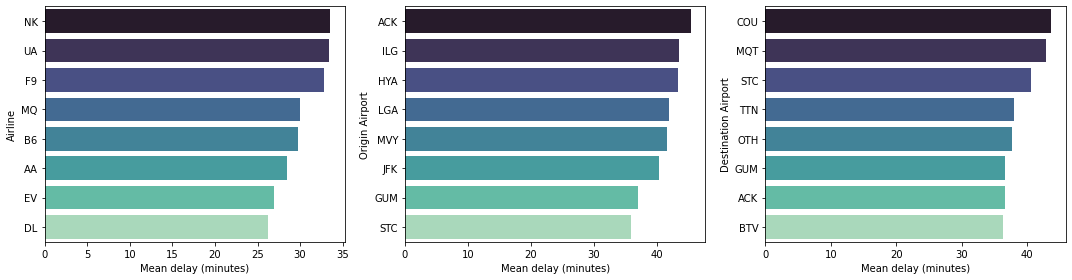

In [101]:
sns.color_palette("mako", as_cmap=True)
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.barplot(
    x=list(al_delay.values()), 
    y=list(al_delay), 
    order=list(dict(sorted(al_delay.items(), key=lambda item: item[1], reverse=True)).keys())[:8],
    ci=None,
    palette ="mako",
    ax=axes[0]
)
axes[0].set(xlabel='Mean delay (minutes)', ylabel='Airline')
sns.barplot(
    x=list(or_delay.values()), 
    y=list(or_delay), 
    order=list(dict(sorted(or_delay.items(), key=lambda item: item[1], reverse=True)).keys())[:8],
    ci=None,
    palette ="mako",
    ax=axes[1]
)
axes[1].set(xlabel='Mean delay (minutes)', ylabel='Origin Airport')
sns.barplot(
    x=list(des_delay.values()), 
    y=list(des_delay), 
    order=list(dict(sorted(des_delay.items(), key=lambda item: item[1], reverse=True)).keys())[:8],
    ci=None,
    palette ="mako",
    ax=axes[2]
)
axes[2].set(xlabel='Mean delay (minutes)', ylabel='Destination Airport')

fig.tight_layout()

In [107]:
est

{'ABE': 14.380993150684931,
 'ABI': 9.46930533117932,
 'ABQ': 12.00249650489315,
 'ABR': 15.865546218487395,
 'ABY': 11.665966386554622,
 'ACK': 17.774436090225564,
 'ACT': 9.356617647058824,
 'ACV': 11.455081001472754,
 'ACY': 12.015912481352562,
 'ADK': 8.54,
 'ADQ': 6.427312775330397,
 'AEX': 12.723867069486404,
 'AGS': 15.902131018153117,
 'AKN': 6.916666666666667,
 'ALB': 14.405311158798284,
 'ALO': 15.356913183279742,
 'AMA': 12.227687425624753,
 'ANC': 12.68090770791075,
 'APN': 12.614864864864865,
 'ASE': 14.375549692172383,
 'ATL': 17.414944243585836,
 'ATW': 15.622589531680442,
 'AUS': 12.845133153938944,
 'AVL': 16.8117123795404,
 'AVP': 15.39218523878437,
 'AZO': 15.28969957081545,
 'BDL': 14.445991261050706,
 'BET': 6.950207468879668,
 'BFL': 14.597510373443983,
 'BGM': 20.037974683544302,
 'BGR': 16.295081967213115,
 'BHM': 13.743061772605193,
 'BIL': 12.485252808988765,
 'BIS': 15.819148936170214,
 'BJI': 17.27777777777778,
 'BLI': 13.32577319587629,
 'BMI': 13.689581856

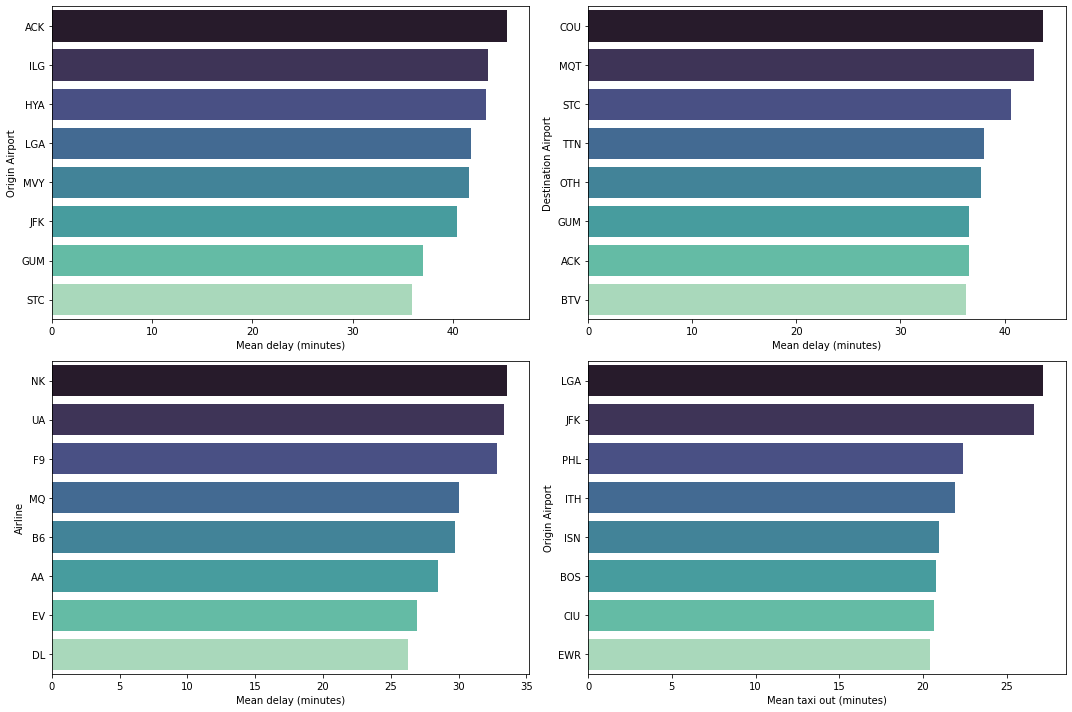

In [110]:
sns.color_palette("mako", as_cmap=True)
fig, axes = plt.subplots(2,2, figsize=(15,10))
sns.barplot(
    x=list(al_delay.values()), 
    y=list(al_delay), 
    order=list(dict(sorted(al_delay.items(), key=lambda item: item[1], reverse=True)).keys())[:8],
    ci=None,
    palette ="mako",
    ax=axes[1,0]
)
axes[1,0].set(xlabel='Mean delay (minutes)', ylabel='Airline')
sns.barplot(
    x=list(or_delay.values()), 
    y=list(or_delay), 
    order=list(dict(sorted(or_delay.items(), key=lambda item: item[1], reverse=True)).keys())[:8],
    ci=None,
    palette ="mako",
    ax=axes[0,0]
)
axes[0,0].set(xlabel='Mean delay (minutes)', ylabel='Origin Airport')
sns.barplot(
    x=list(des_delay.values()), 
    y=list(des_delay), 
    order=list(dict(sorted(des_delay.items(), key=lambda item: item[1], reverse=True)).keys())[:8],
    ci=None,
    palette ="mako",
    ax=axes[0,1]
)
axes[0,1].set(xlabel='Mean delay (minutes)', ylabel='Destination Airport')
sns.barplot(
    x=list(est.values()), 
    y=list(est), 
    order=list(dict(sorted(est.items(), key=lambda item: item[1], reverse=True)).keys())[:8],
    ci=None,
    palette ="mako",
    ax=axes[1,1]
)
axes[1,1].set(xlabel='Mean taxi out (minutes)', ylabel='Origin Airport')

fig.tight_layout()

In [112]:
from sklearn.preprocessing import StandardScaler

X_train = train_tax[['DISTANCE','TAXI_OUT','WHEELS_OFF','DEPARTURE_DELAY', 
                         'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'EST_TAXI_IN']]

y_train = train_tax["ARRIVAL_DELAY"].values

X_test = test_tax[['DISTANCE','TAXI_OUT','WHEELS_OFF','DEPARTURE_DELAY', 
                      'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'EST_TAXI_IN']]

def standScal(df):
    col_names = list(df.columns)

    s_scaler = StandardScaler()
    df_s = s_scaler.fit_transform(df)

    df_s = pd.DataFrame(df_s, columns=col_names)
    
    return df_s

X_train_s = standScal(X_train)
X_test_s = standScal(X_test)

model.fit(X_train_s, y_train)

xfit14 = X_test_s.values

yfit14 = model.predict(xfit14)

pd.DataFrame(yfit14, columns=['ARRIVAL_DELAY']).to_csv('submit_sample15.csv', index_label='id')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
